<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_1_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

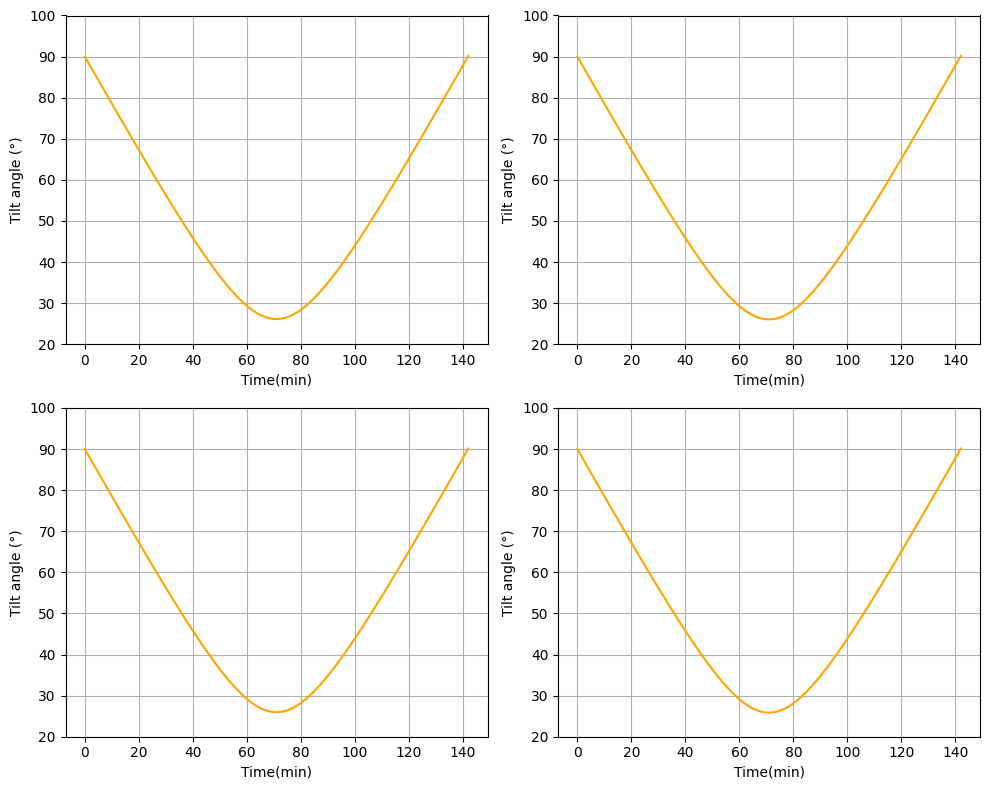

In [11]:
#Example 1.10

import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 3.12  # Latitude for Kuala Lumpur
LOD = 101.7  # Longitude
T_GMT = 8  # Time difference from GMT
Step = 5  # Time step in minutes

BetaT = []


for N in range(1, 5):
    Ds = 23.45 * np.sin(np.radians((360 * (N - 81)) / 365))
    B = (360 * (N - 81)) / 364
    EoT = (9.87 * np.sin(np.radians(2 * B))) - (7.53 * np.cos(np.radians(B))) - (1.5 * np.sin(np.radians(B)))
    Lzt = 15 * T_GMT
    Ts_correction = (-4 * (Lzt - LOD) + EoT) if LOD >= 0 else (4 * (Lzt - LOD) + EoT)

    Wsr_ssi = -np.tan(np.radians(Ds)) * np.tan(np.radians(L))
    Wsrsr_ss = np.degrees(np.arccos(Wsr_ssi))
    ASTsr = abs(((Wsrsr_ss / 15) - 12) * 60)
    ASTss = ((Wsrsr_ss / 15) + 12) * 60
    Tsr = ASTsr + abs(Ts_correction)
    Tss = ASTss + abs(Ts_correction)

    Alpha = []

    for LMT in np.arange(Tsr, Tss + Step, Step):
        Ts = LMT + Ts_correction
        Hs = (15 * (Ts - (12 * 60))) / 60
        sin_Alpha = (np.sin(np.radians(L)) * np.sin(np.radians(Ds)) +
                     np.cos(np.radians(L)) * np.cos(np.radians(Ds)) * np.cos(np.radians(Hs)))
        Alpha_i = np.degrees(np.arcsin(sin_Alpha))
        Alpha.append(Alpha_i)

    Alpha = np.array(Alpha)
    Beta = 90 - Alpha
    BetaT.append(Beta)

BetaT = np.array(BetaT).T

# Separate columns
Beta1 = BetaT[:, 0]
Beta2 = BetaT[:, 1]
Beta3 = BetaT[:, 2]
Beta4 = BetaT[:, 3]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(Beta1, color='orange')

axs[0, 0].set_ylim(20, 100)

axs[0, 1].plot(Beta2, color='orange')

axs[0, 1].set_ylim(20, 100)

axs[1, 0].plot(Beta3, color='orange')

axs[1, 0].set_ylim(20, 100)

axs[1, 1].plot(Beta4, color='orange')

axs[1, 1].set_ylim(20, 100)

for ax in axs.flat:
    ax.set_ylabel('Tilt angle (°)')
    ax.set_xlabel('Time(min)')
    ax.grid(True)

plt.tight_layout()
plt.show()
